<a href="https://colab.research.google.com/github/Krisho1/Machine-Learning-Foundations-Math-Probability-Statistics-and-Computer-Science-Python-Codes-/blob/main/batch_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradiant of cost of batch of data

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [3]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [4]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

In [15]:
yhat = regression(xs,m,b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [6]:
def mse(my_yhat,my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma/(len(my_y))

In [7]:
C = mse(yhat,ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [8]:
C.backward()

In [10]:
m.grad

tensor([36.3050])

In [11]:
b.grad

tensor([6.2650])

dC/dm = (2/n)(sigma(yhat-y)*x



dc/db = (2/n)(sigma(yhat-y)

In [17]:
#(2/len(ys))*(torch.sum(yhat-ys))*xs

2*1/len(ys)*torch.sum((yhat - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [21]:
(2/len(ys))*(torch.sum(yhat - ys))

tensor(6.2650, grad_fn=<MulBackward0>)

In [22]:
gradiant = torch.tensor([[b.grad.item(),m.grad.item()]]).T
gradiant

tensor([[ 6.2650],
        [36.3050]])

In [23]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

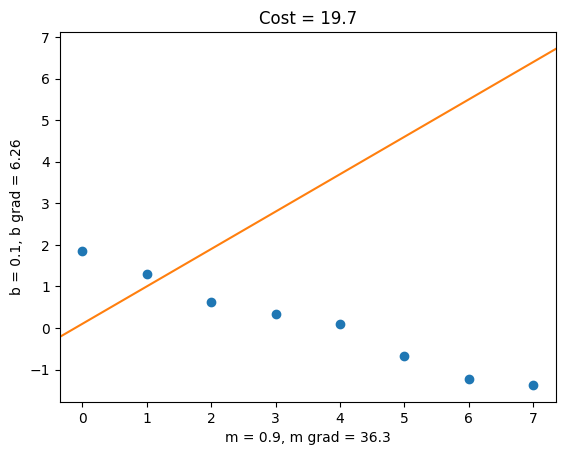

In [24]:
labeled_regression_plot(xs, ys, m, b, C)

Decrese in m and b results in decrese in C

In [25]:
optimizer = torch.optim.SGD([m,b], lr = 0.01)


In [26]:
optimizer.step()

In [27]:
C = mse(regression(xs,m,b),ys)
C

tensor(8.5722, grad_fn=<DivBackward0>)

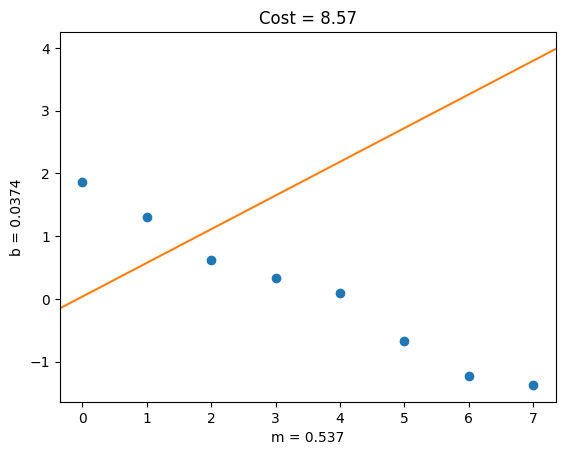

In [28]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

<ipython-input-23-fce6232e8ab3>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


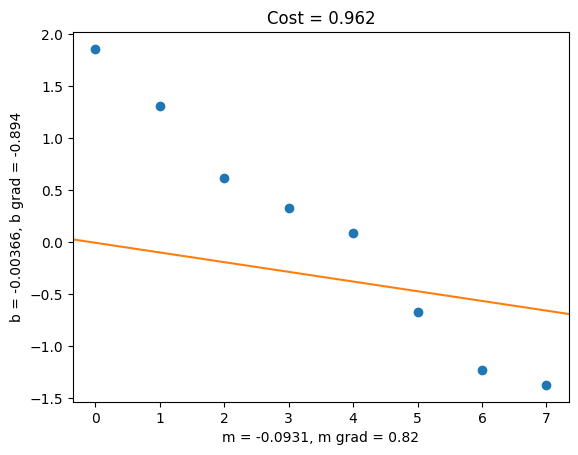

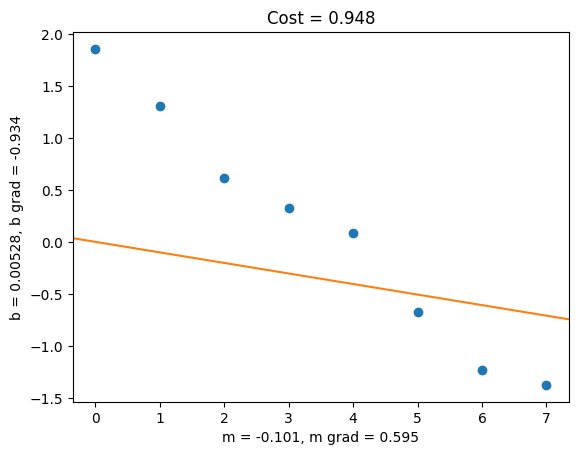

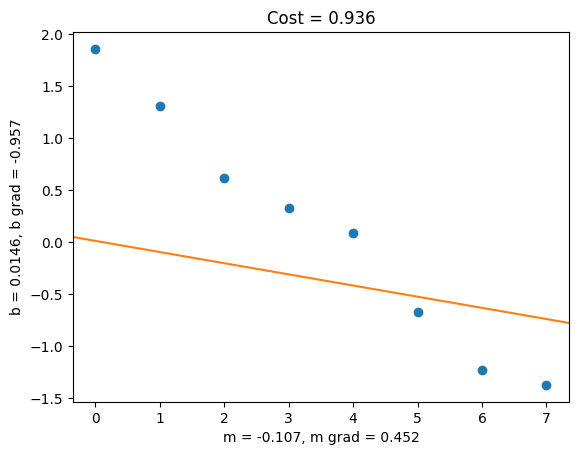

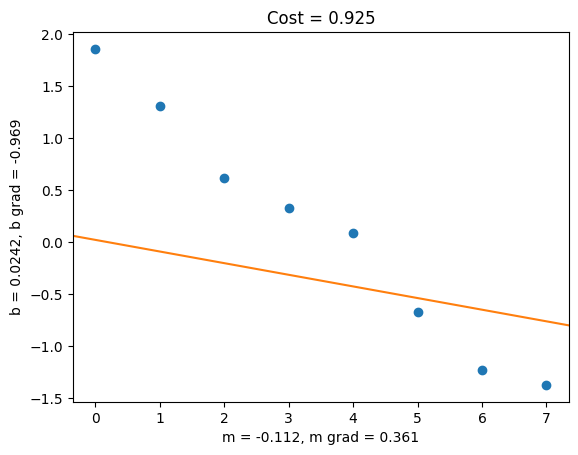

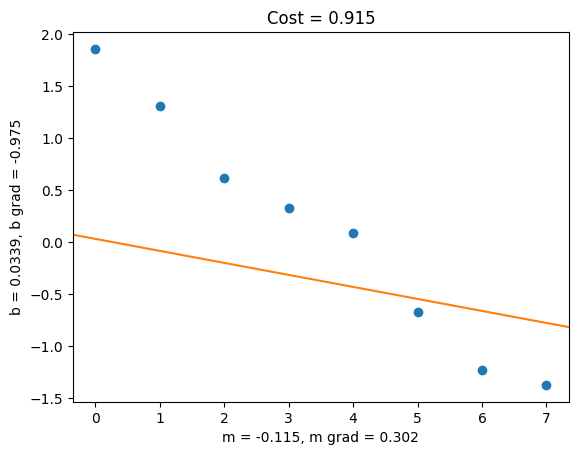

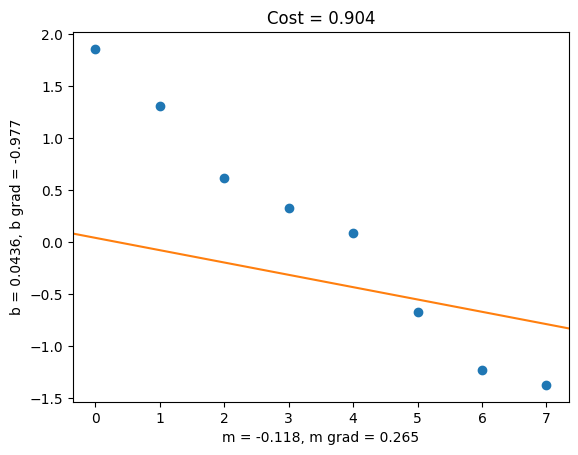

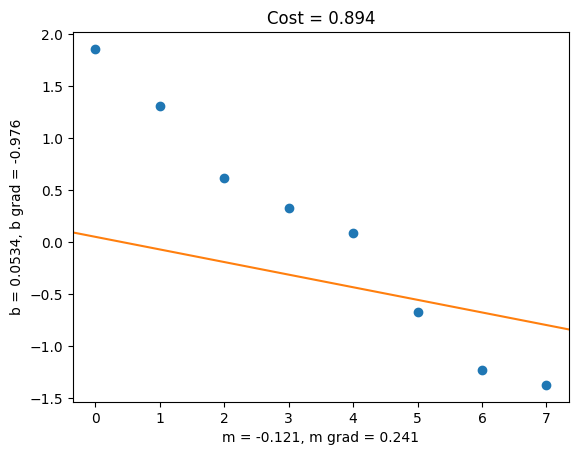

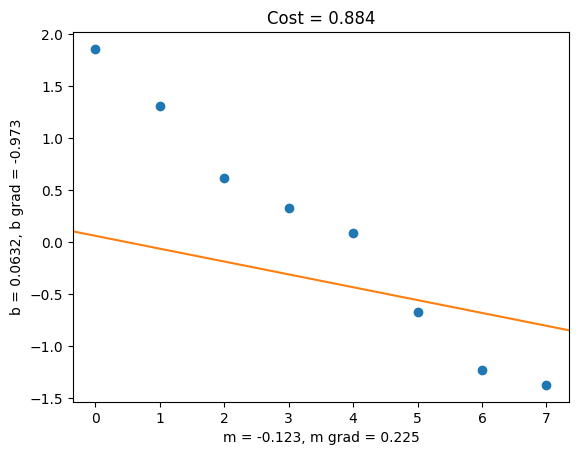

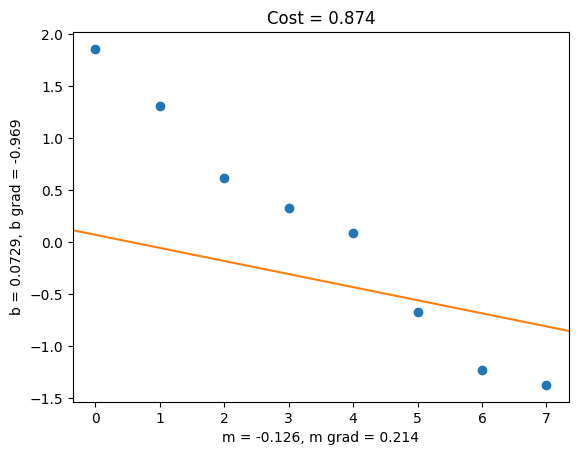

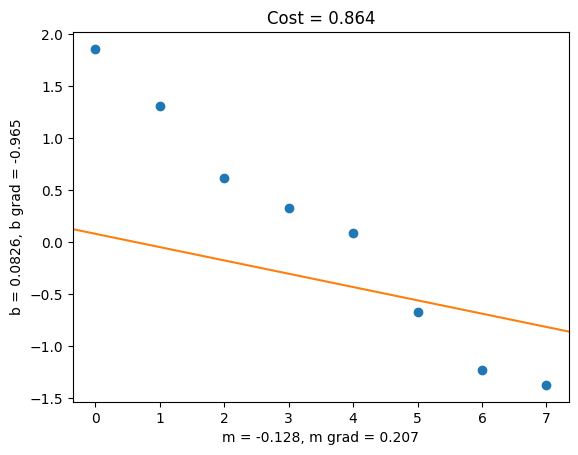

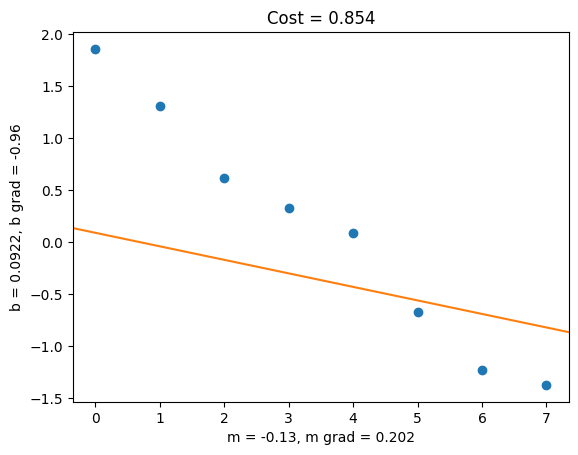

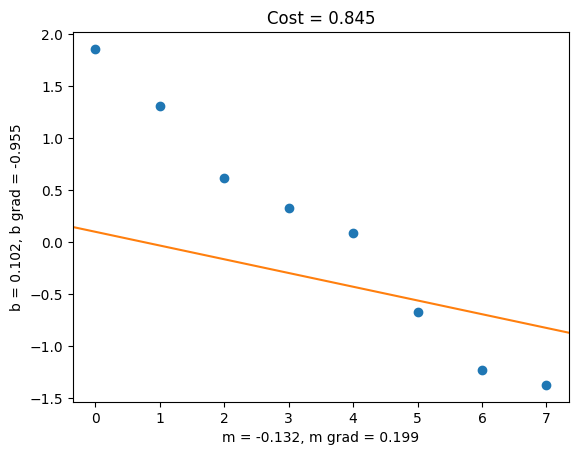

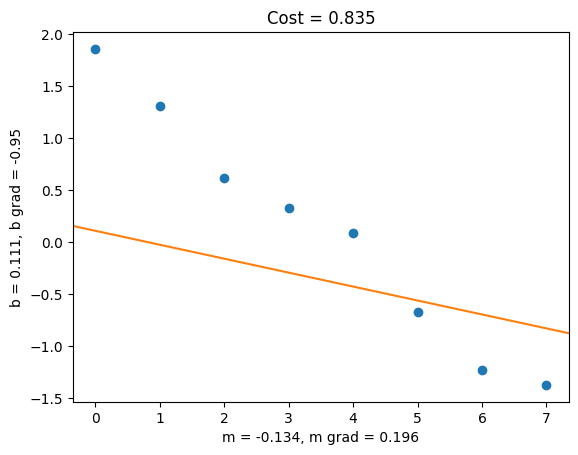

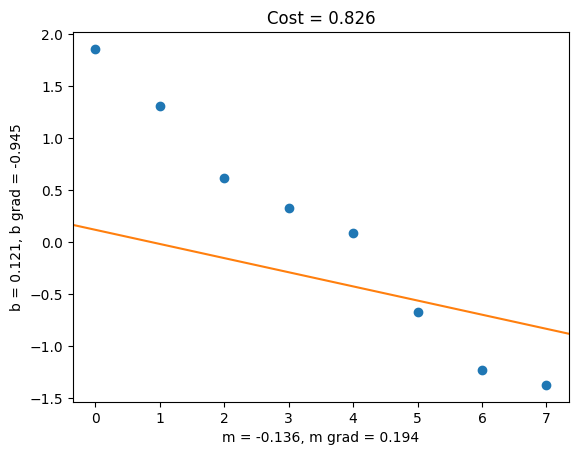

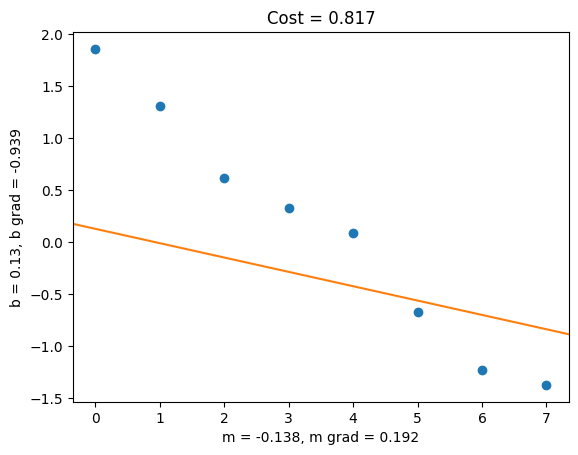

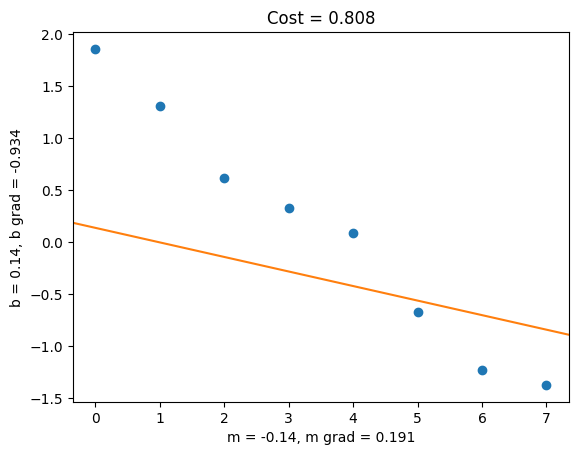

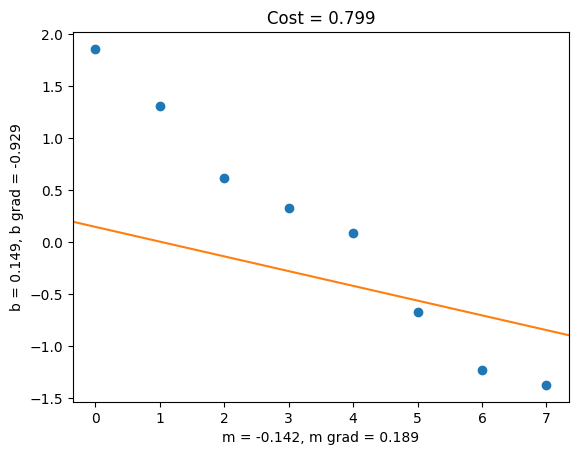

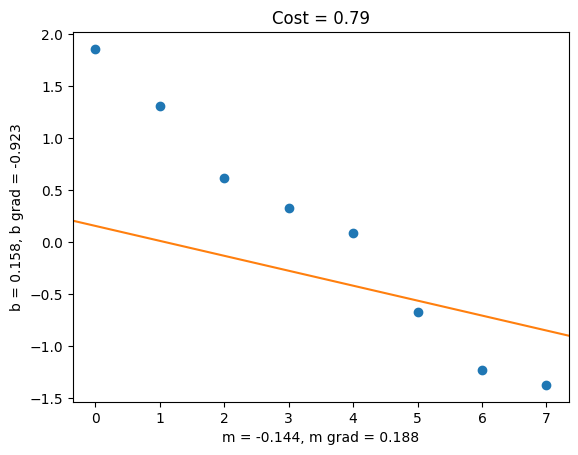

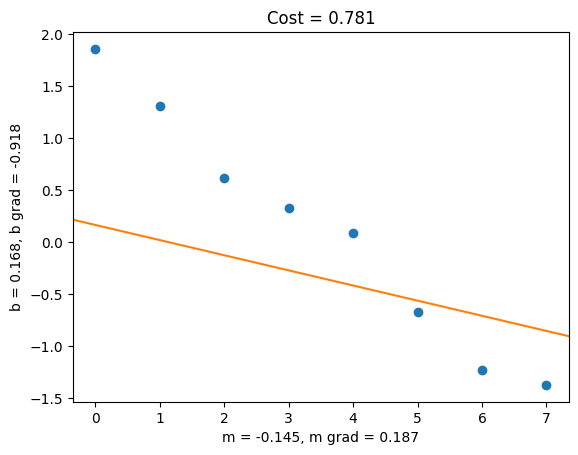

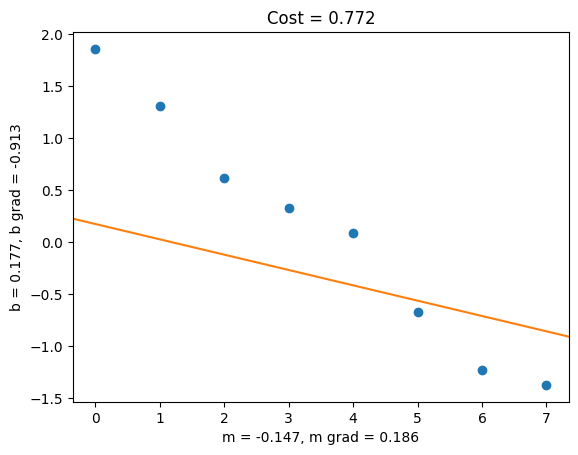

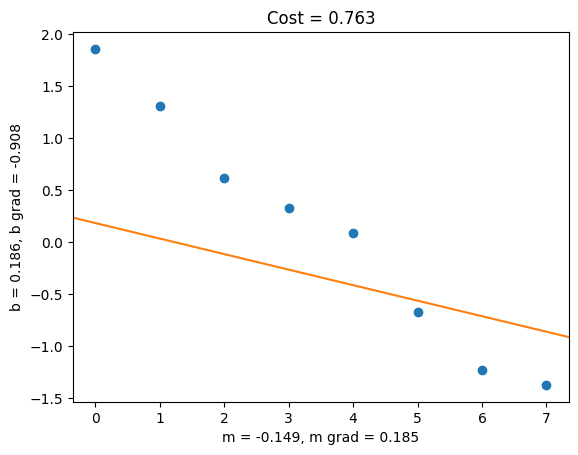

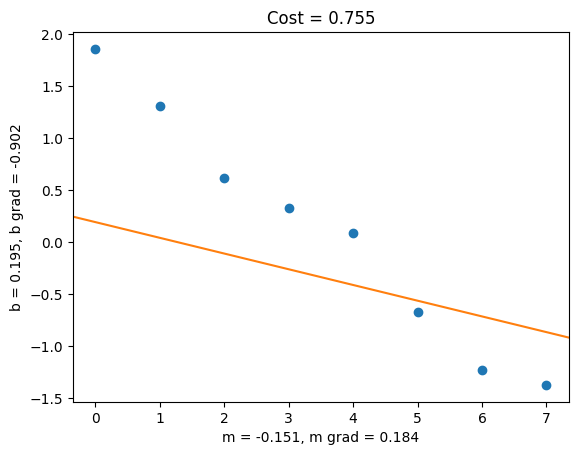

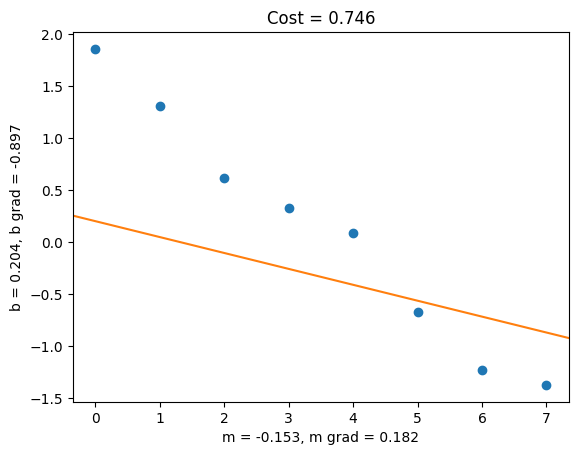

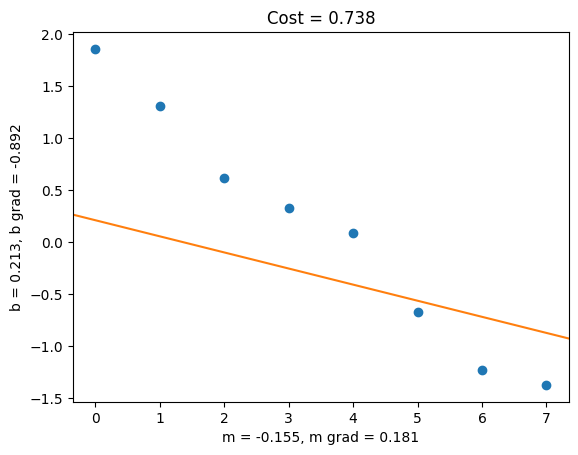

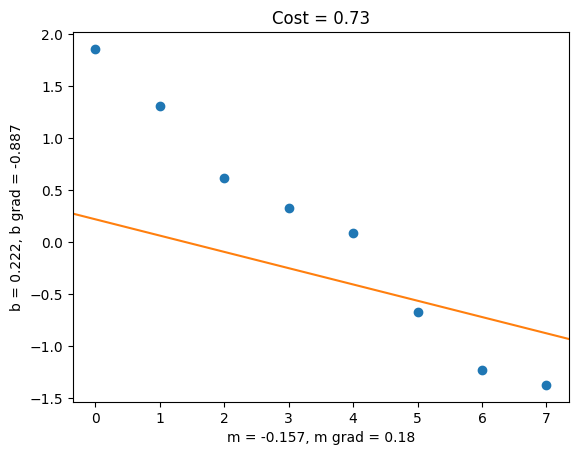

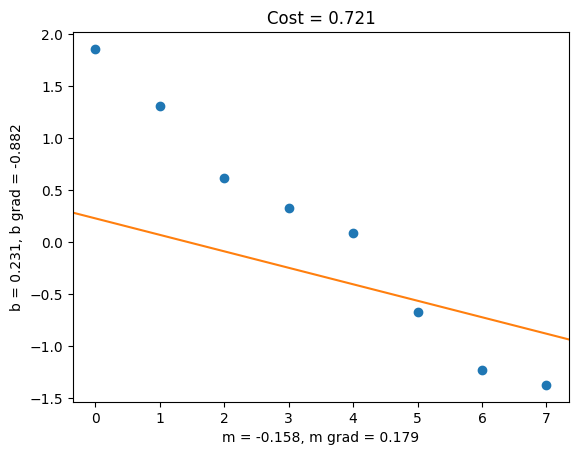

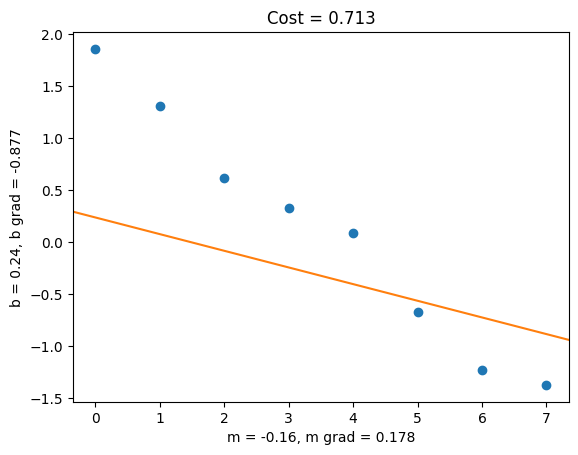

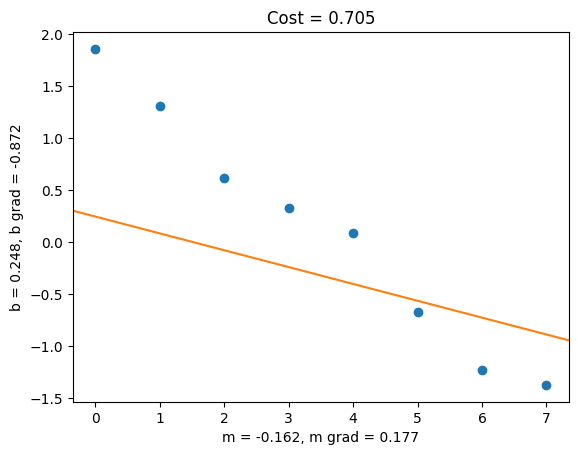

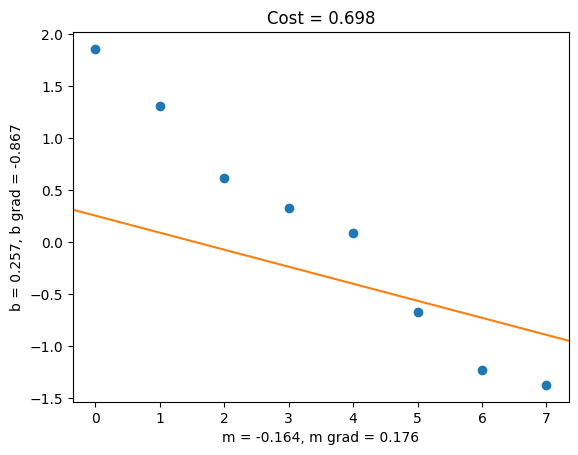

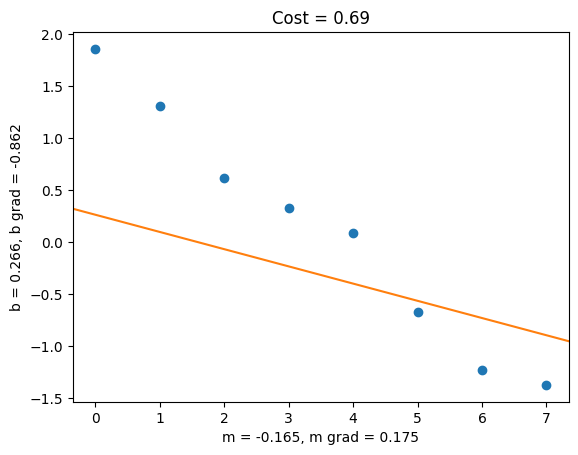

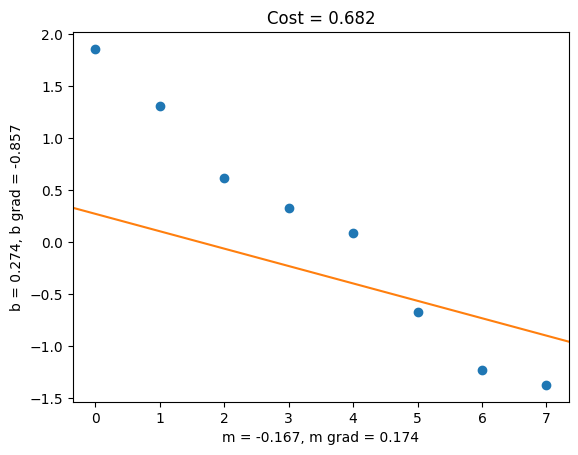

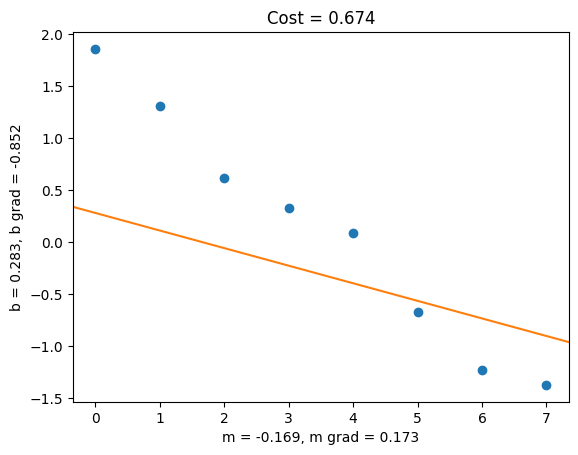

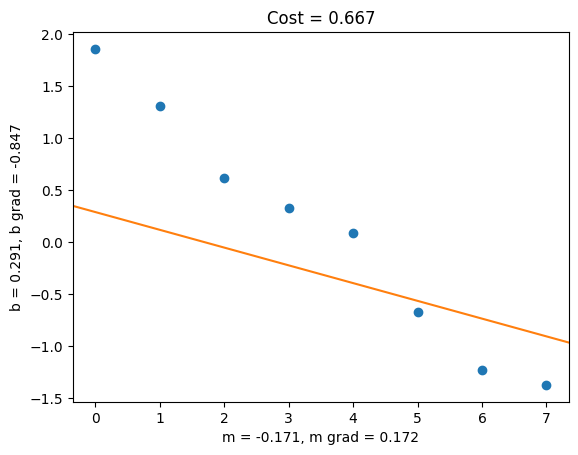

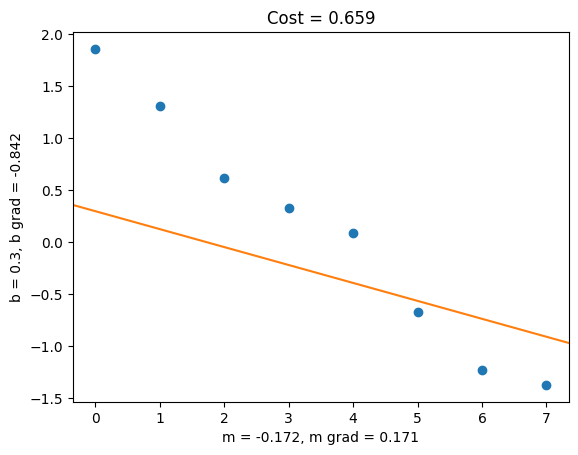

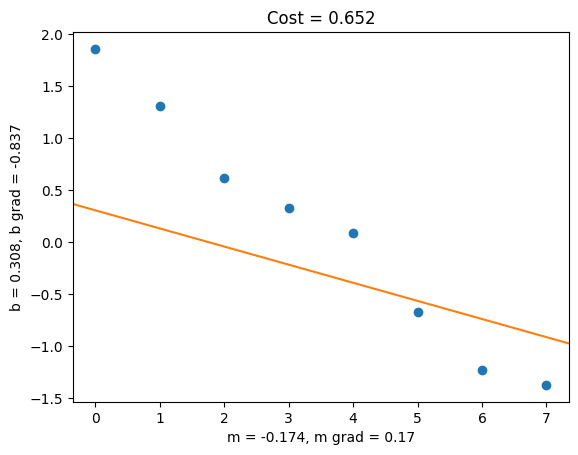

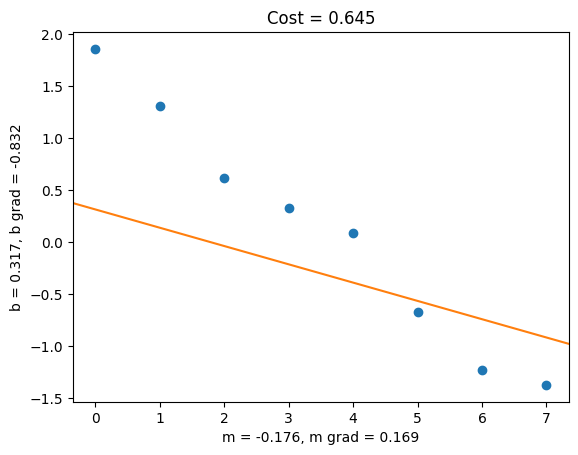

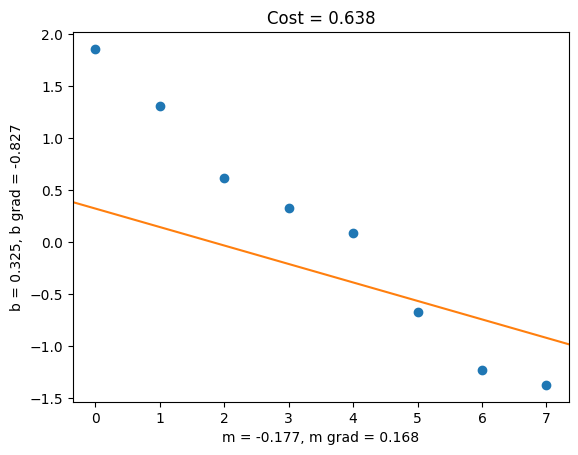

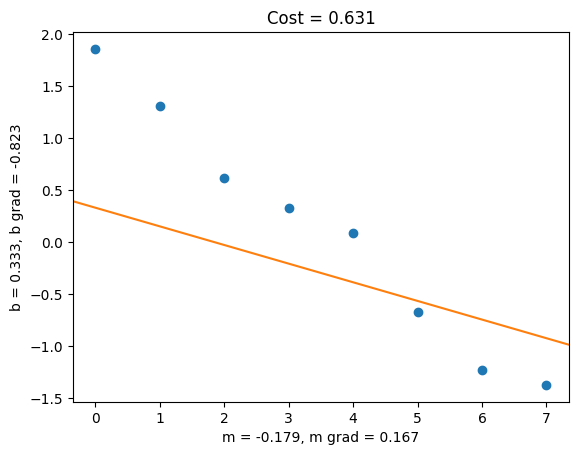

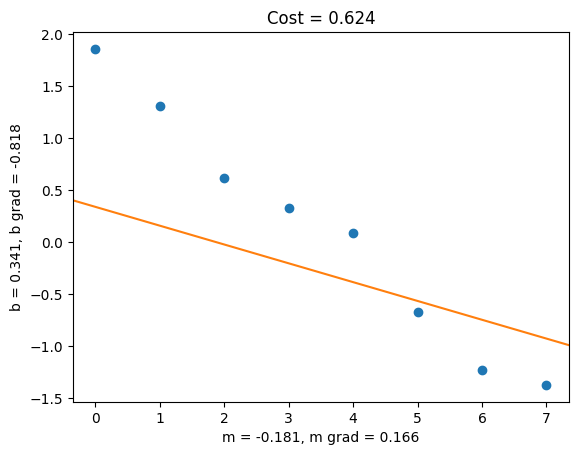

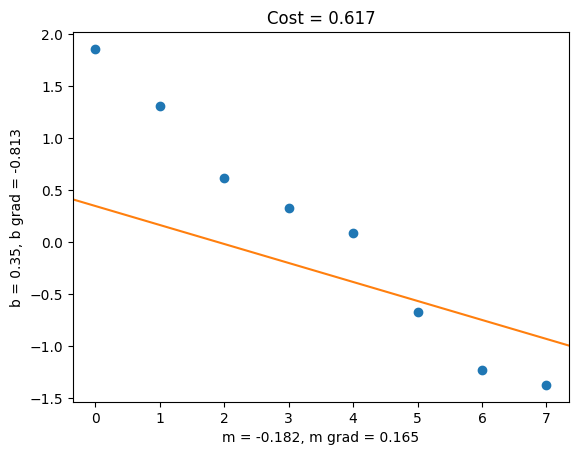

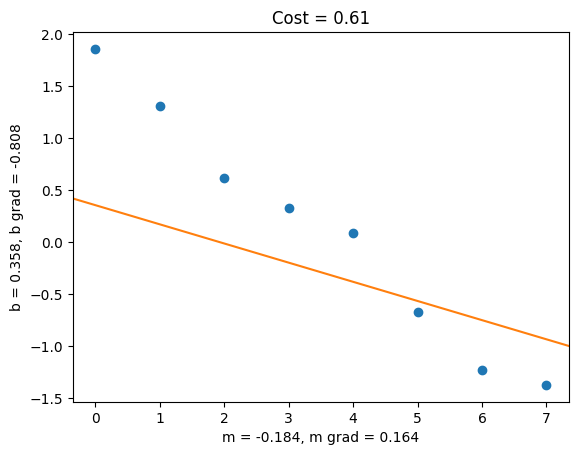

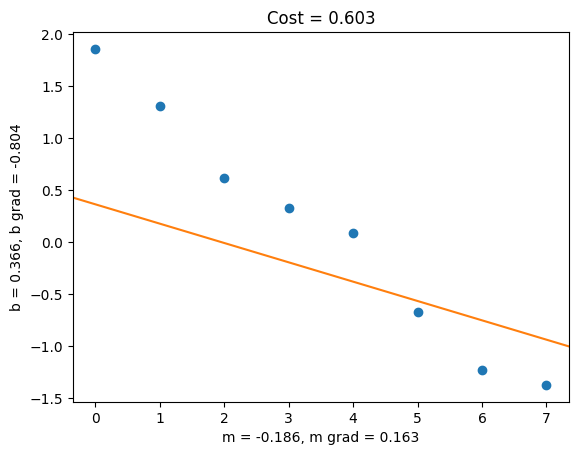

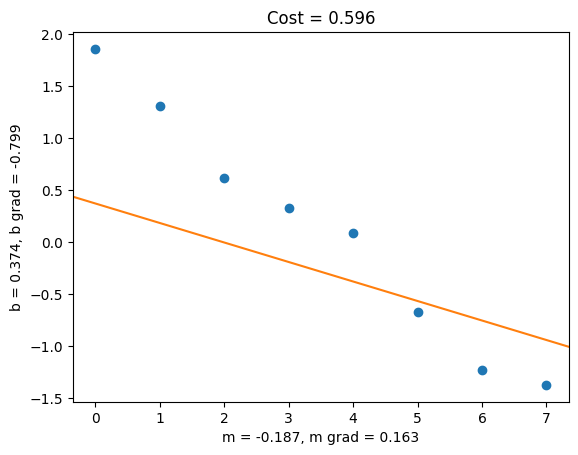

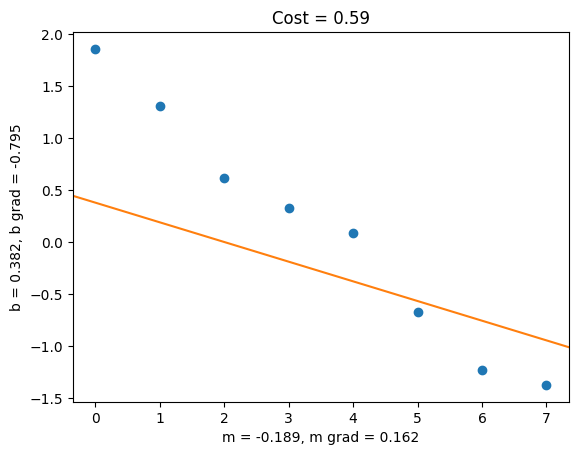

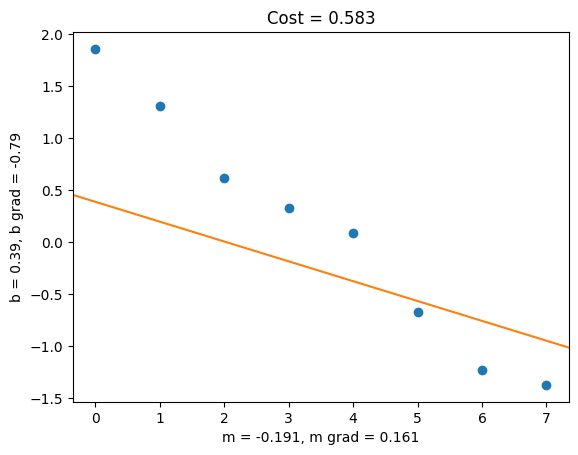

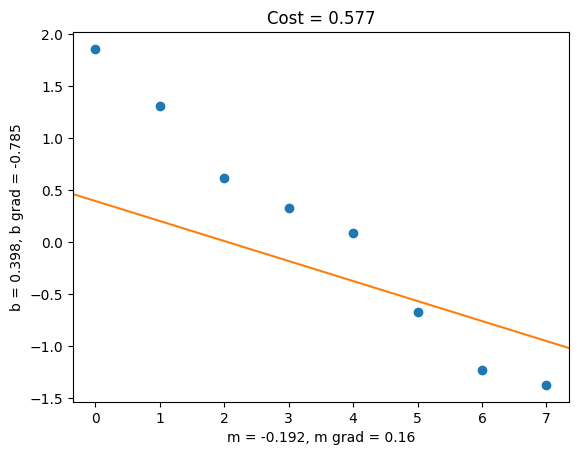

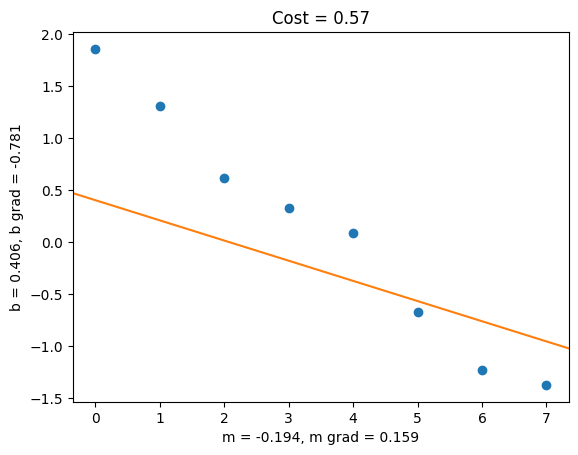

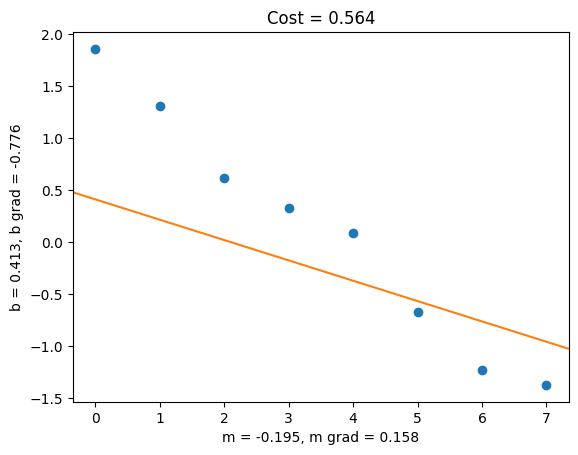

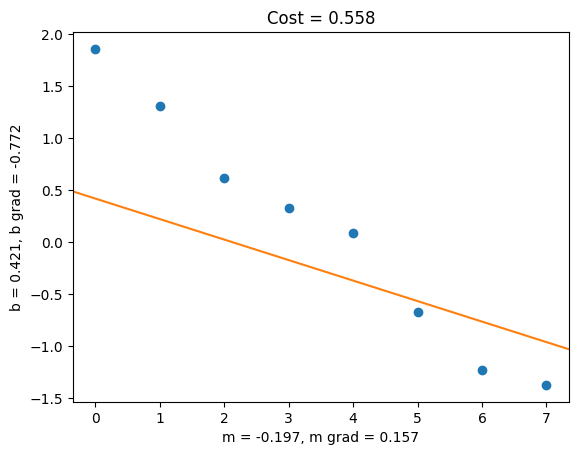

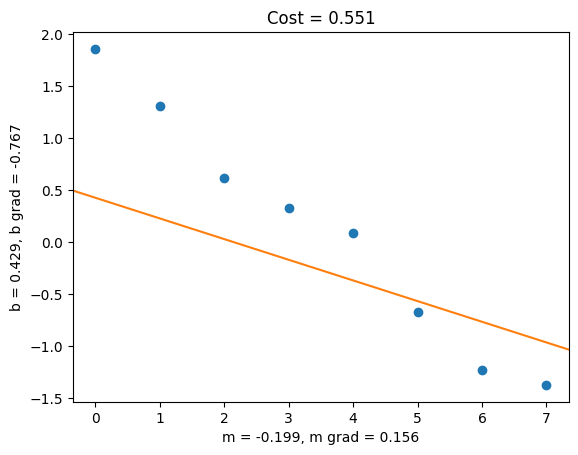

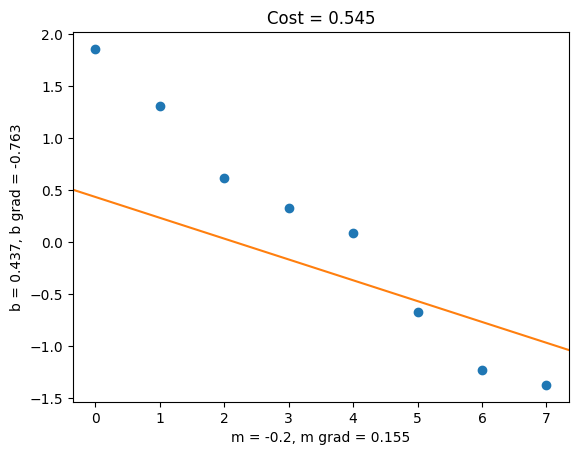

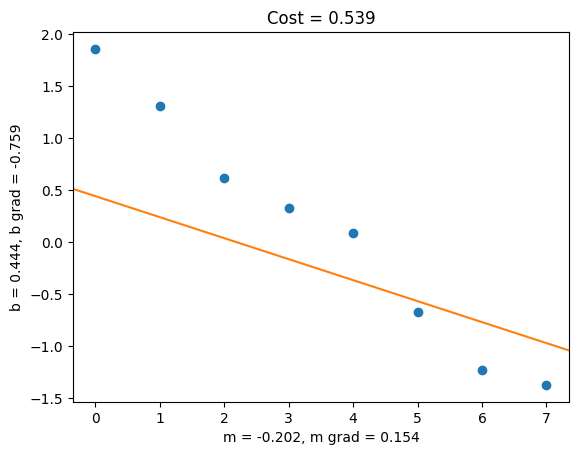

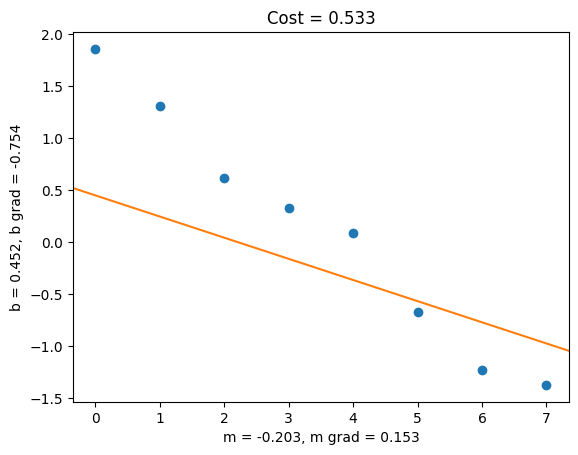

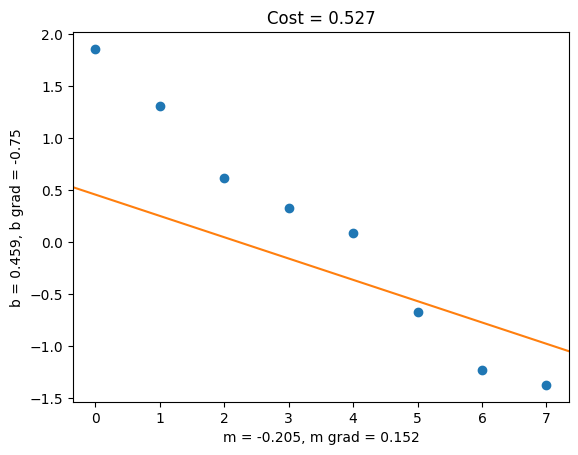

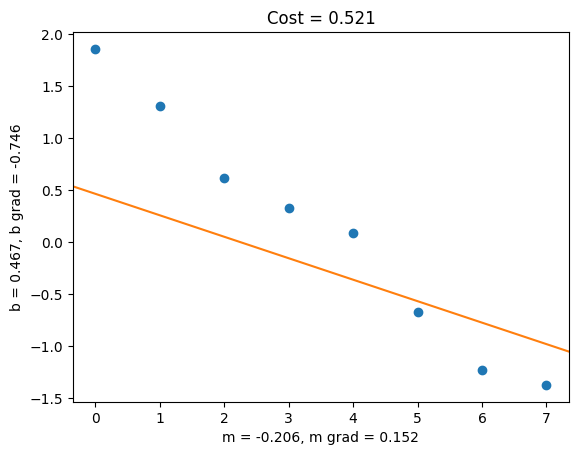

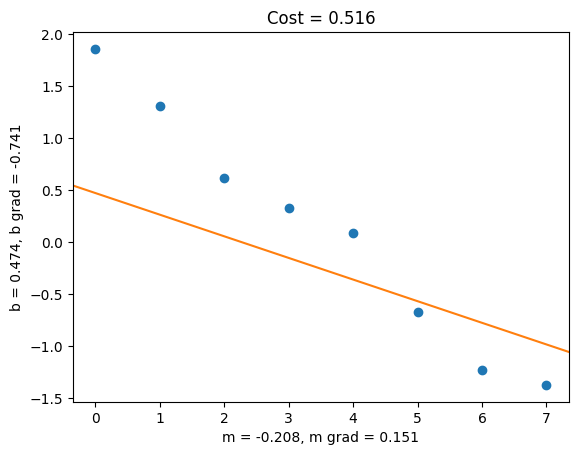

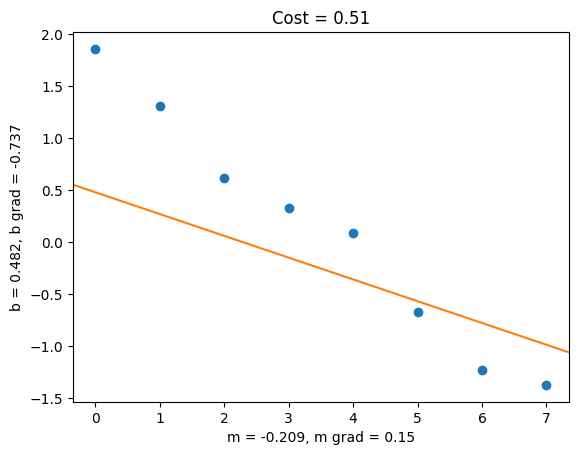

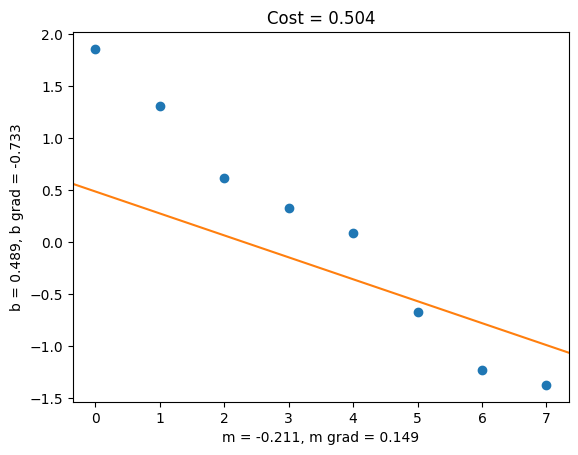

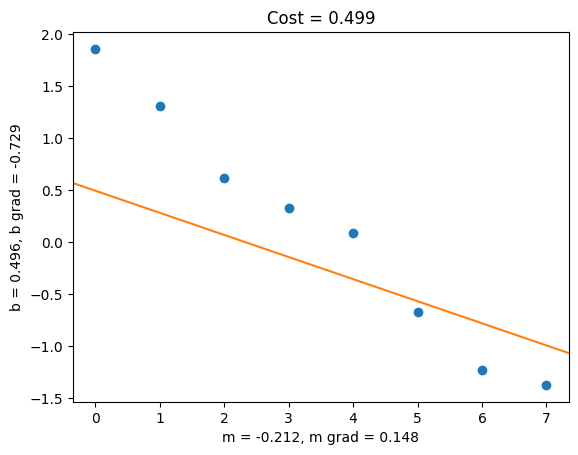

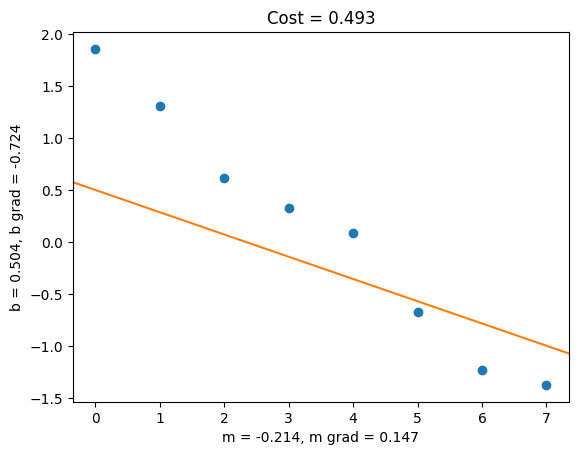

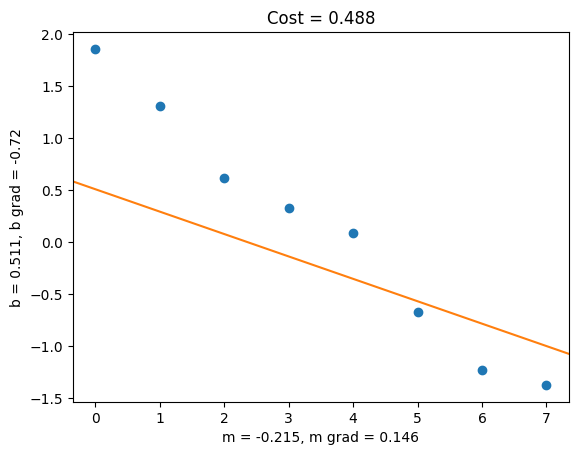

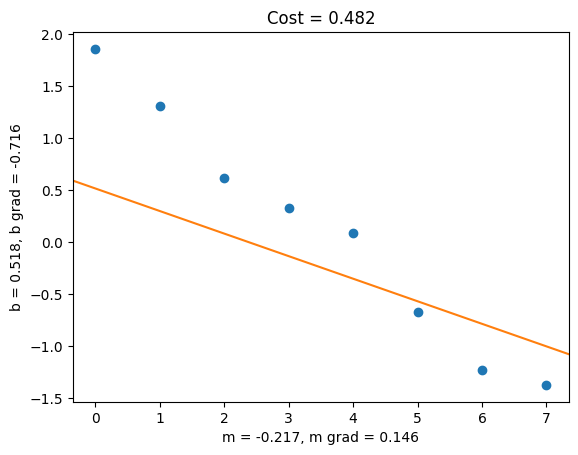

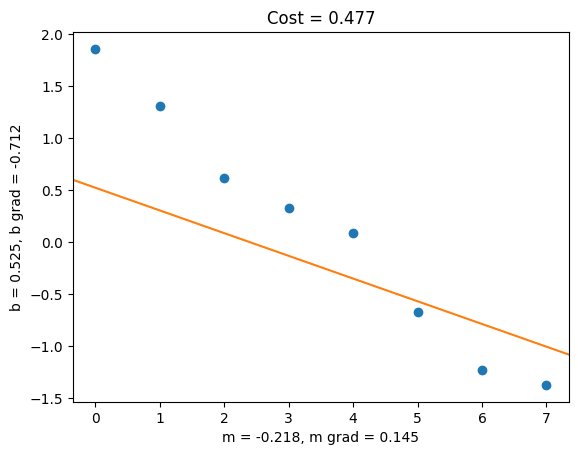

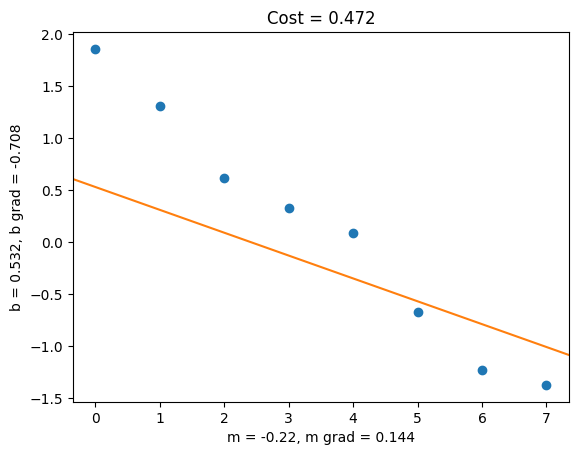

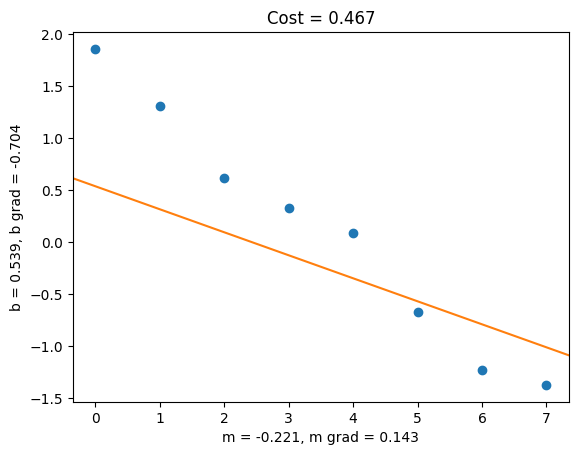

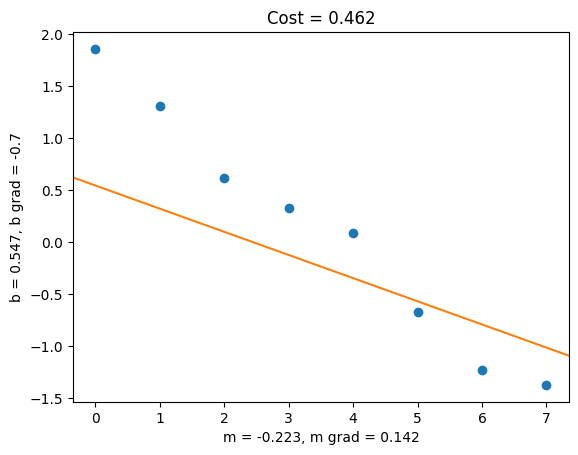

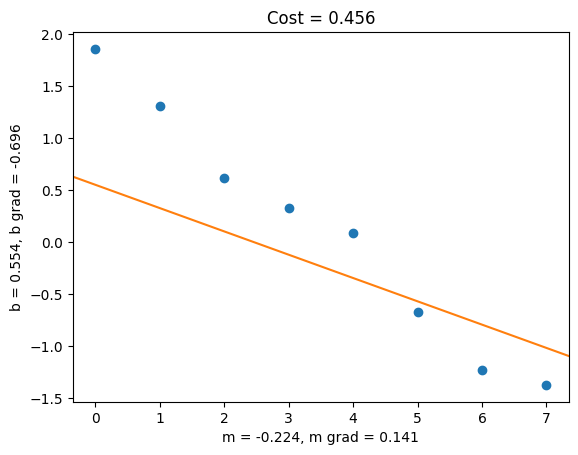

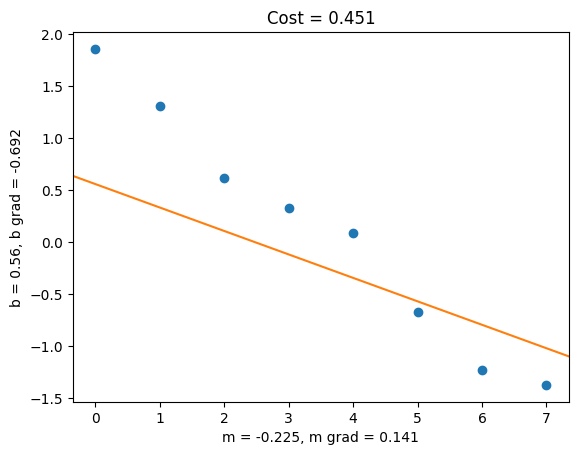

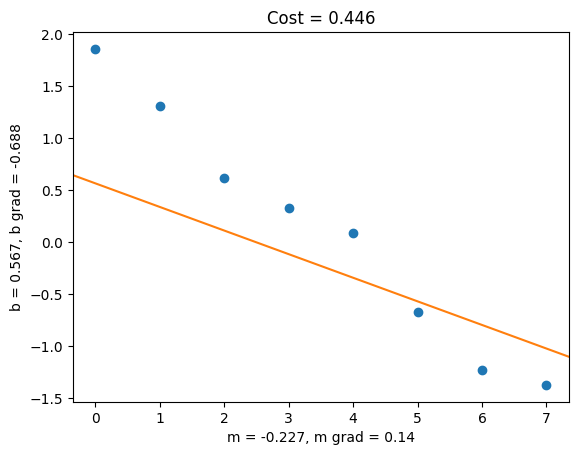

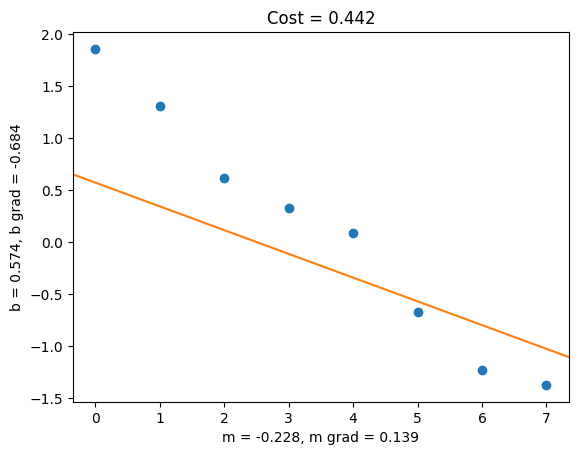

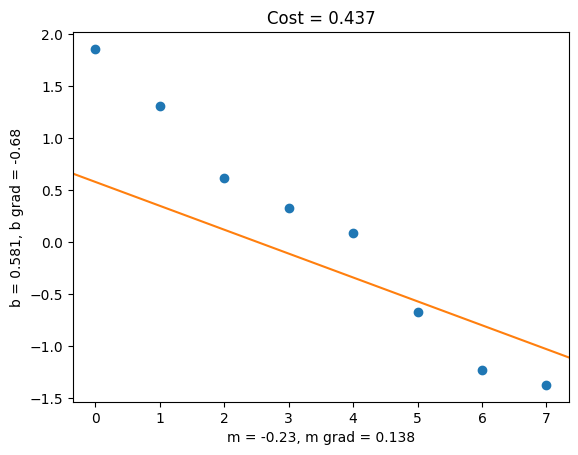

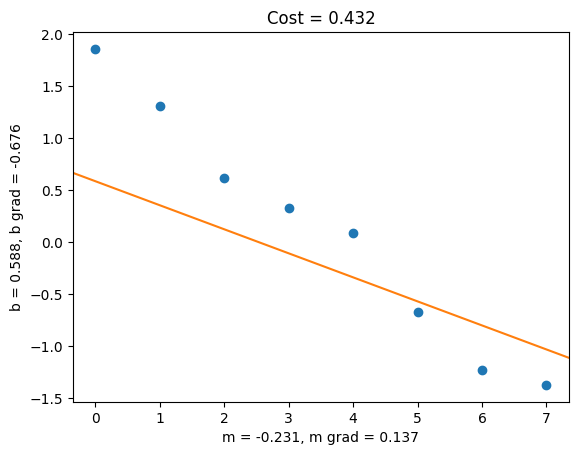

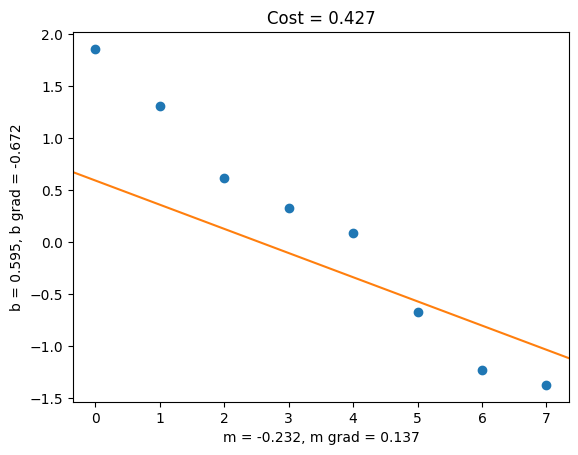

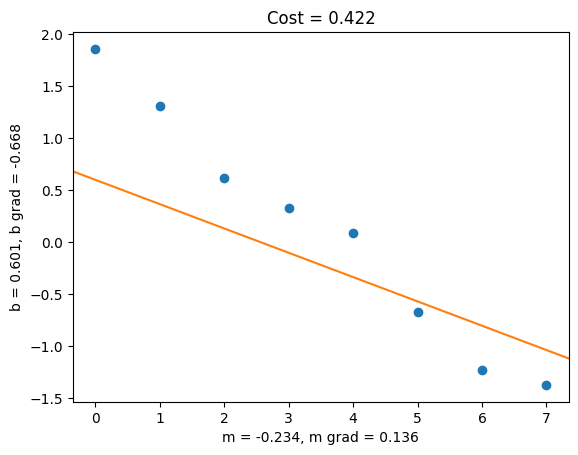

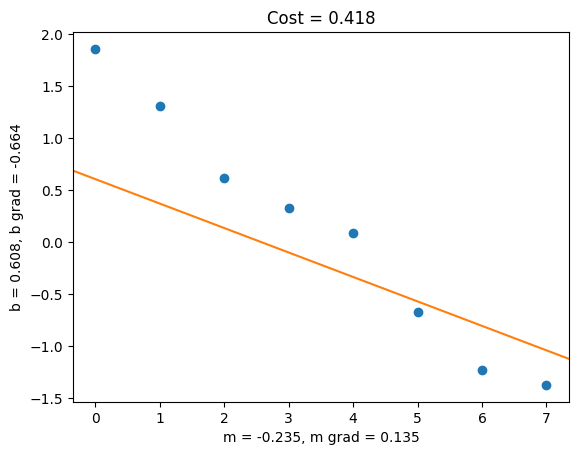

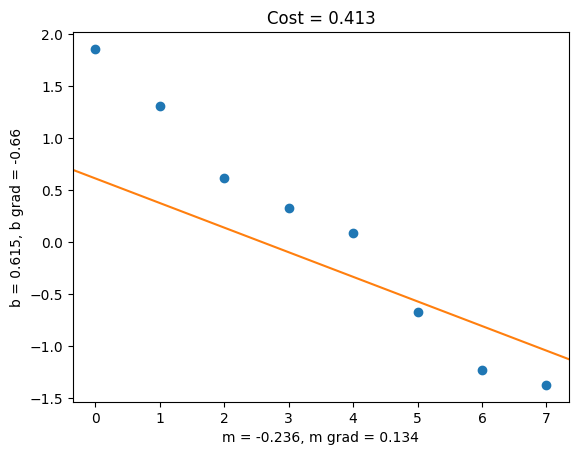

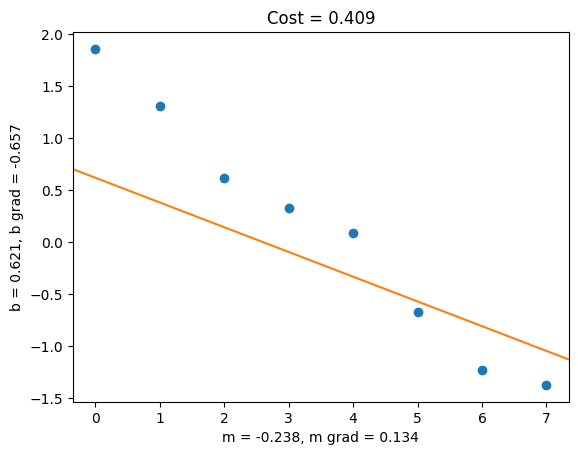

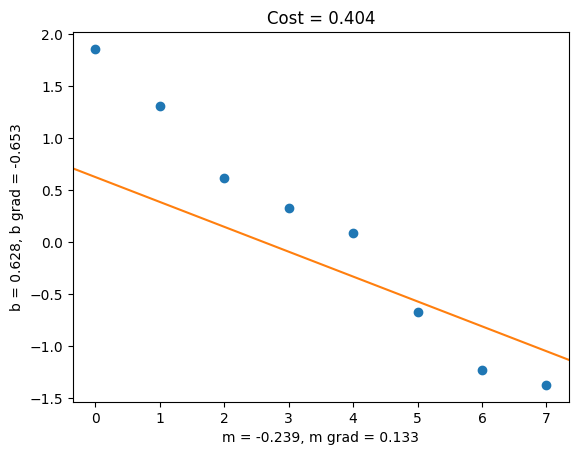

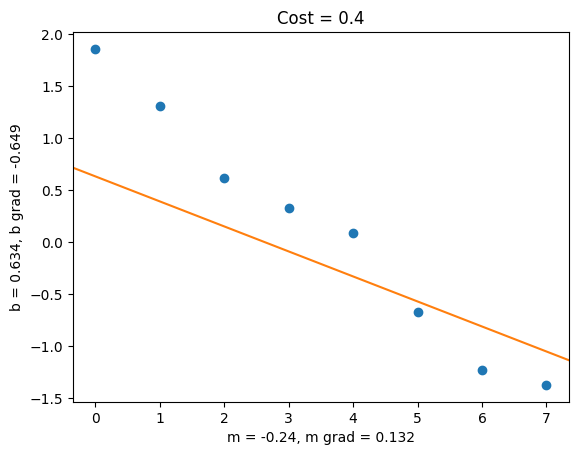

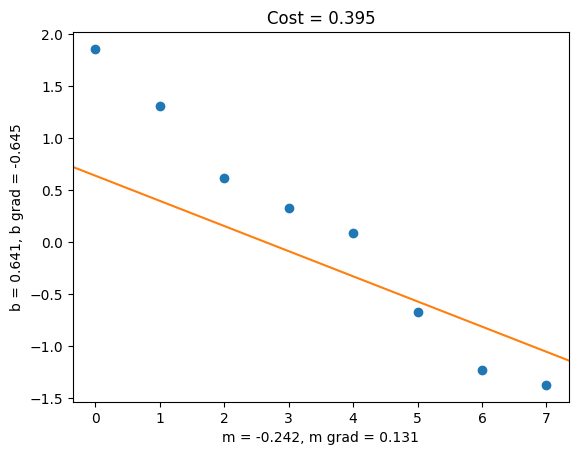

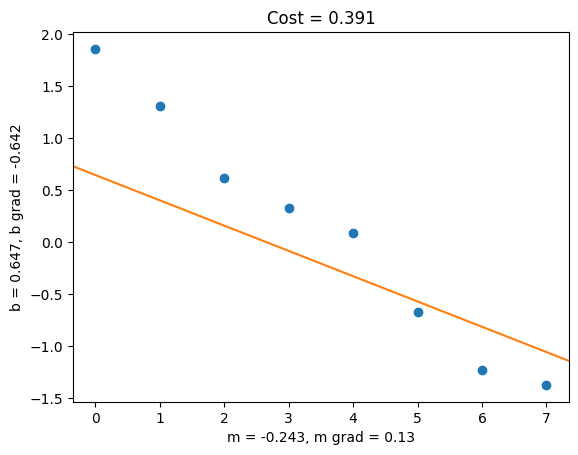

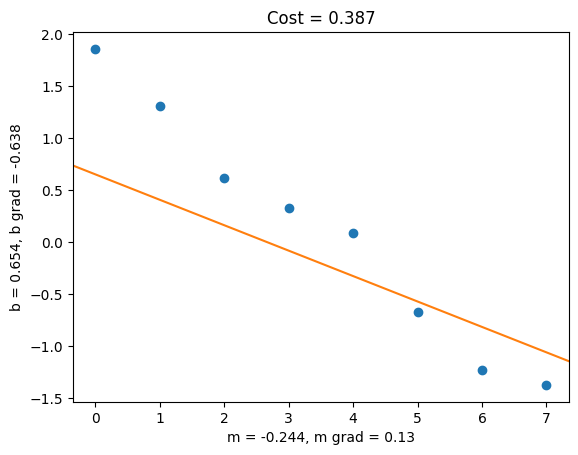

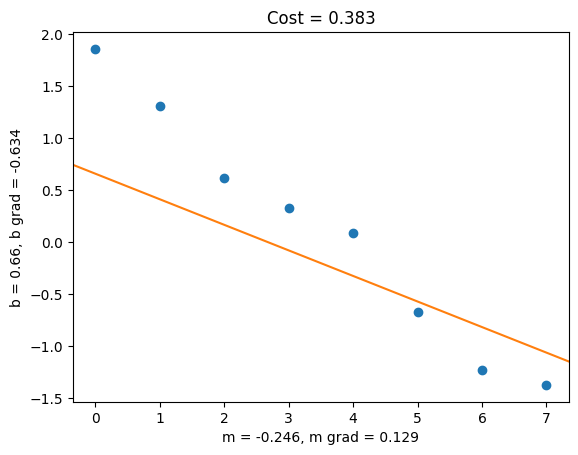

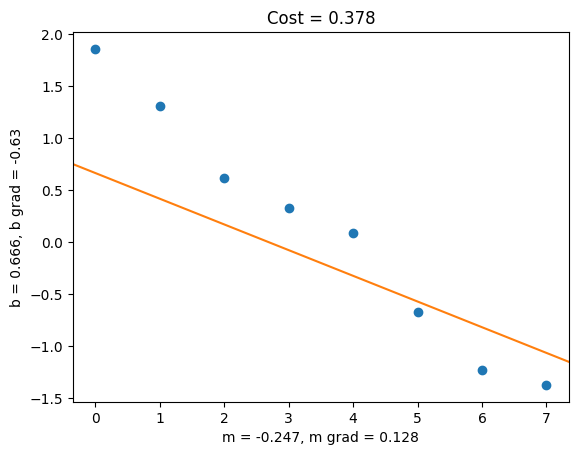

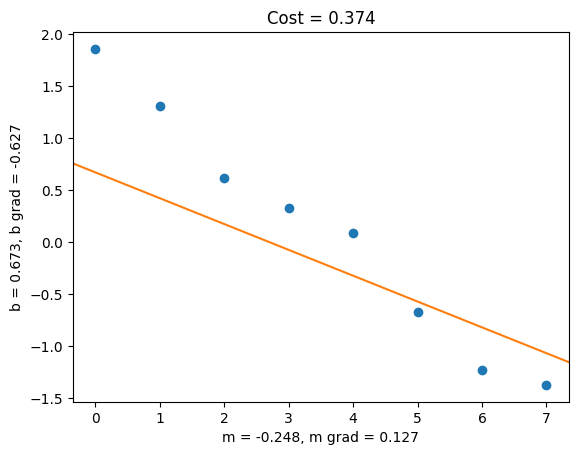

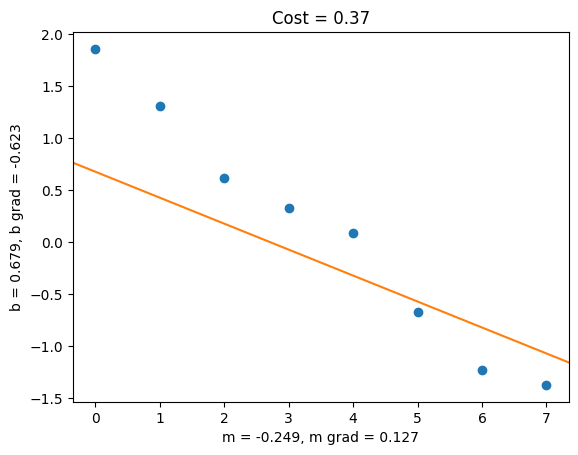

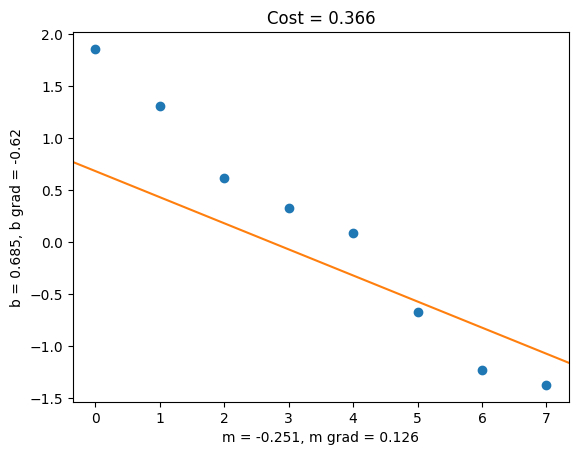

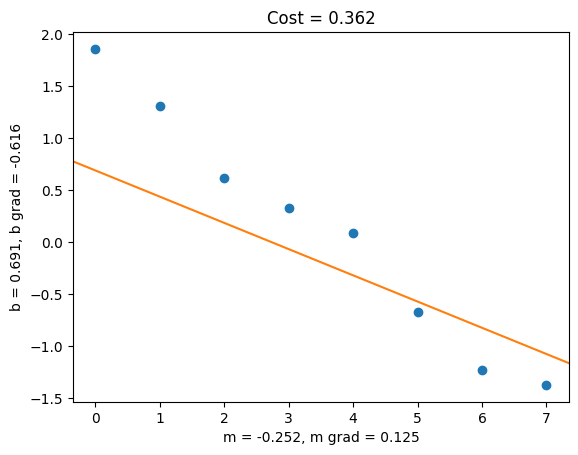

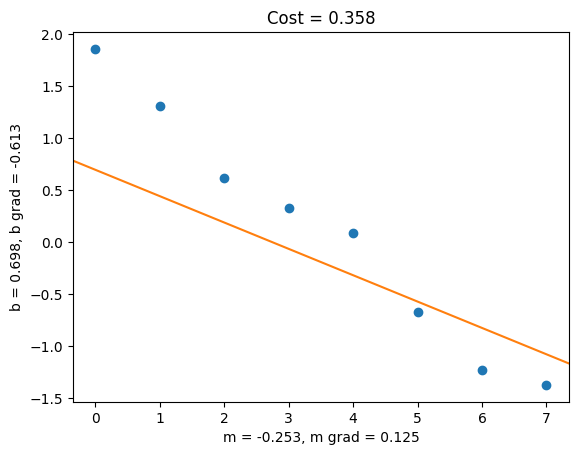

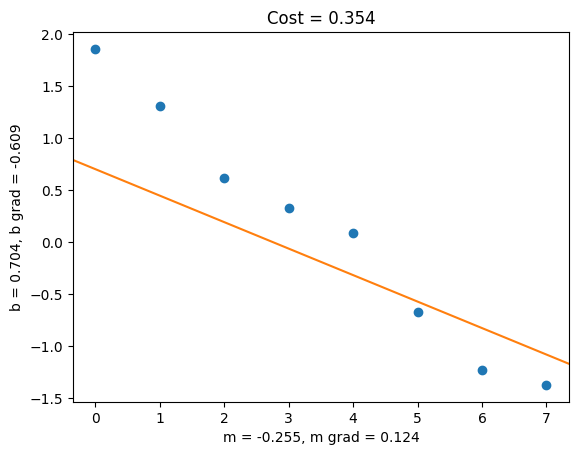

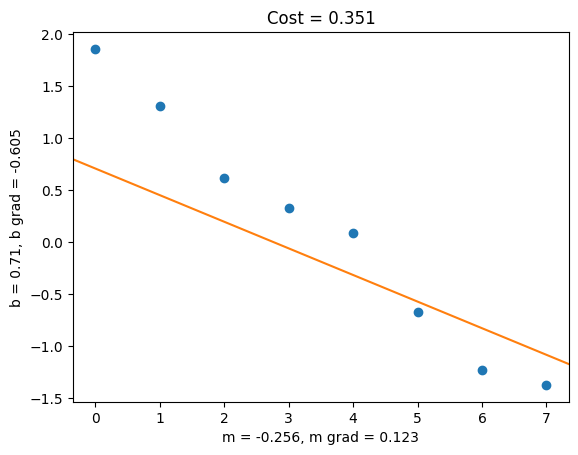

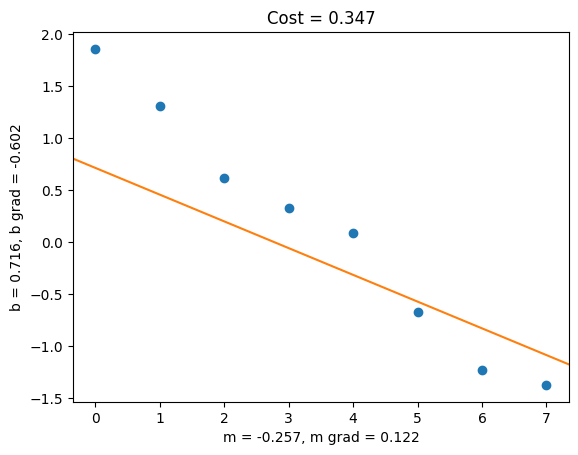

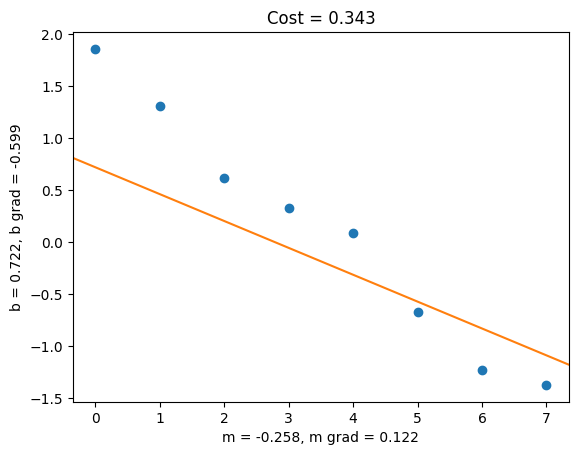

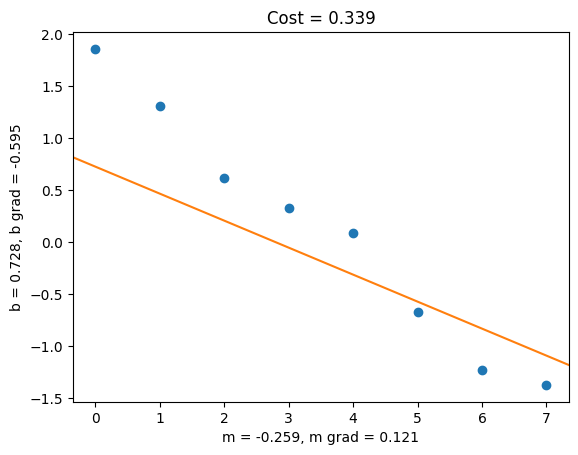

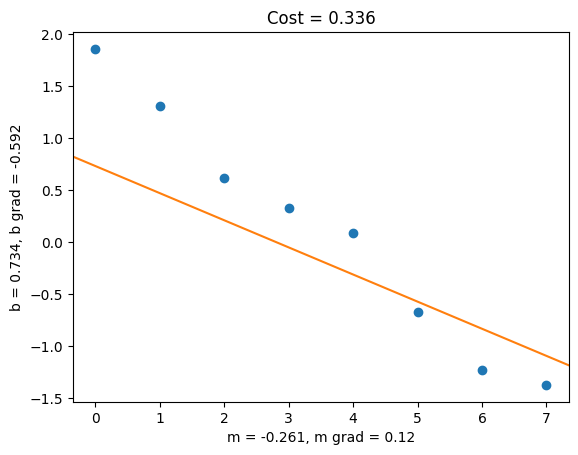

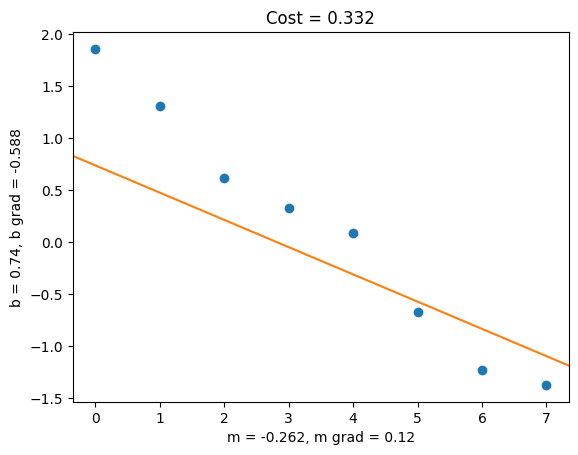

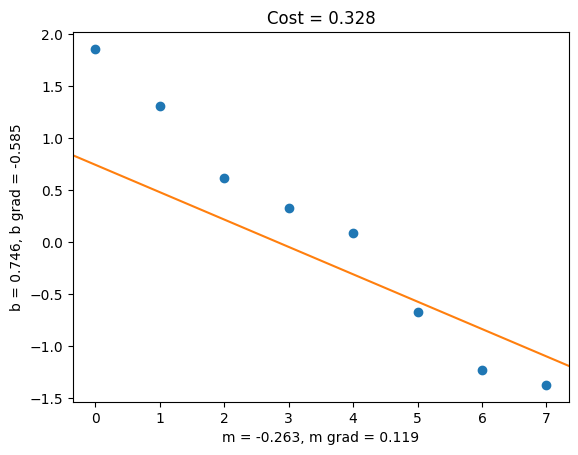

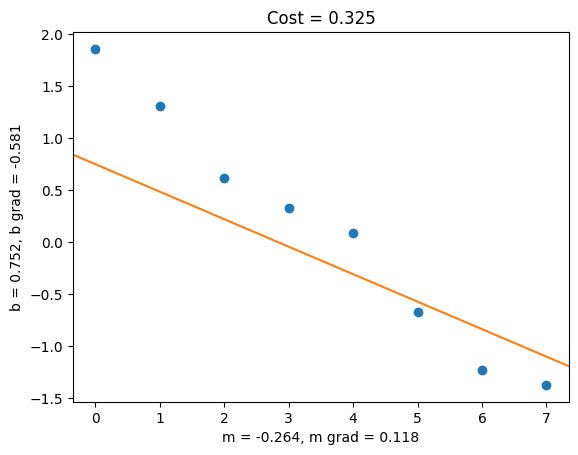

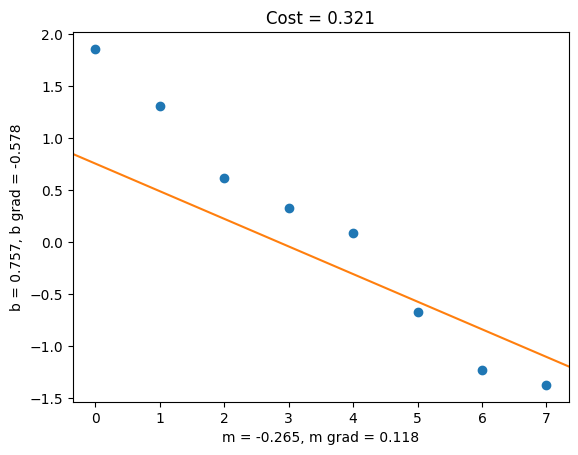

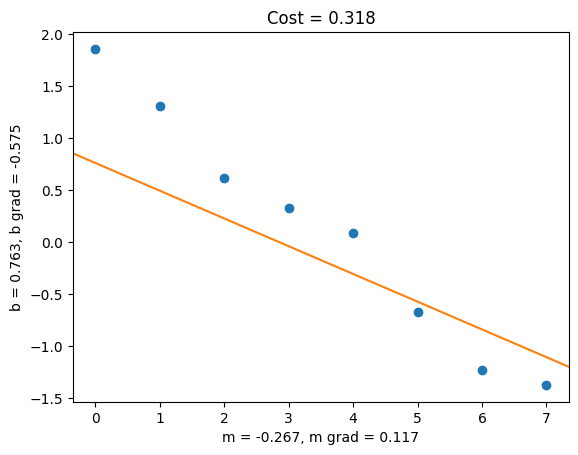

In [30]:
epochs = 100
for epoch in range(epochs):
  optimizer.zero_grad()
  C = mse(regression(xs,m,b),ys)
  C.backward()
  labeled_regression_plot(xs, ys, m, b, C)
  optimizer.step()